# Assignment 1

Course: Introduction to Computer Vision <br>
Student: Danis Alukaev <br>
Email: d.alukaev@innopolis.university <br>
Group: B19-DS-01

### Introduction to Computer Vision (Fall 2022)
Instructor: Muhammad Fahim \\
TA: Batoul Yaseen, Karam Almaghout

## Assignment 1

**Grading Criteria:**

Task1: 15%

Task2: 25%

Task3: 30%

Task4: 30%


**Notes**

Non working code is 0 - no matter what is writtern in the code 

Student must solve the question using the required method mentioned in that question. For example, if the question asks to use "connected components" and the student solved it with another method he/she will get 0 for that question.

----------
Write you own code if we find plagiarism then score will be 0  for similar code to both students.

late submission penalty: -20%/day

Deadline 3rd of October (End of the day)

download images

In [1]:
# All plots will be displayed directly below the code cell that produced it
%matplotlib inline
from matplotlib import pyplot as plt
from IPython.display import clear_output
# Set inline plots size
plt.rcParams["figure.figsize"] = (16, 10) # (w, h)
# Remove grid lines
import numpy as np
import time
import cv2
import math

!wget https://www.dropbox.com/s/4we7dhwj4pv8zx1/image-asset.jpeg?dl=0 -O th_img.jpg
!wget https://www.dropbox.com/s/e9y352iocrc2bpt/cnt_img.jpg?dl=0 -O cnt_img.jpg
!wget https://www.dropbox.com/s/y61wbt48ztiwr1y/scene1.jpg?dl=0 -O scene.jpg
!wget https://www.dropbox.com/s/cgxrvpmtlouinxo/book1.jpg?dl=0 -O book.jpg
!wget https://www.dropbox.com/s/agjglpthhstnm6f/final%20%281%29.jpg?dl=0 -O final_template.jpg
!wget https://www.dropbox.com/s/56zqbf11pkzn8qx/classification%20%281%29.jpg?dl=0 -O classes.jpg
!wget https://www.dropbox.com/s/scbsb0rqx490lmm/blocks.jpg?dl=0 -O blocks.jpg
!wget https://www.dropbox.com/s/8ilfln1bsvw9ol6/labeled_blocks.jpg?dl=0 -O blocks_labeld.jpg

--2022-10-03 20:39:31--  https://www.dropbox.com/s/4we7dhwj4pv8zx1/image-asset.jpeg?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.85.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.85.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/4we7dhwj4pv8zx1/image-asset.jpeg [following]
--2022-10-03 20:39:32--  https://www.dropbox.com/s/raw/4we7dhwj4pv8zx1/image-asset.jpeg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc53856661b217618ddcc203ce86.dl.dropboxusercontent.com/cd/0/inline/BuL7Metbjtp57CGyzZWT2o9lqB8BjWV-6cMZfaKn7RVN1tK3tbQsq5J8_S85-3boEGWytjjDz63QcSqAZCHKkygdjEI2X2P70IEBQ8AIc4u8C7t9P89jycKTlv685i8MwZOWcSmTji_1K53eDax6lgu7ef22AJND1u-T9EuWPNegxA/file# [following]
--2022-10-03 20:39:32--  https://uc53856661b217618ddcc203ce86.dl.dropboxusercontent.com/cd/0/inline/BuL7Metbjtp57CGyzZWT2o9lqB8BjWV-6cMZfaKn7RVN1tK3tbQsq5J8_S85

Helper functions - it is optional to use them

In [2]:
# function to read and resize an image
def read_and_resize(filename, grayscale = False, fx= 0.5, fy=0.5):
    if grayscale:
      img_result = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
      imgbgr = cv2.imread(filename, cv2.IMREAD_COLOR)
      img_result = cv2.cvtColor(imgbgr, cv2.COLOR_BGR2RGB)
    img_result = cv2.resize(img_result, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)
    return img_result

def showInRow(list_of_images, titles = None, disable_ticks = False):
  count = len(list_of_images)
  for idx in range(count):
    subplot = plt.subplot(1, count, idx+1)
    if titles is not None:
      subplot.set_title(titles[idx])
      
    img = list_of_images[idx]
    cmap = 'gray' if (len(img.shape) == 2 or img.shape[2] == 1) else None
    subplot.imshow(img, cmap=cmap)
    if disable_ticks:
      plt.xticks([]), plt.yticks([])
  plt.show()

# function for colors arrat generation
def generate_colors(num):
  r = lambda: np.random.randint(0,255)
  return [(r(),r(),r()) for _ in range(num)]

### Task 1: Adaptive Thresholding
Given an image (colored and gray scale), implement adaptive thresholding from scratch and output as a thresholded binary image.

Use interactive interface to allow setting the block size, method, the constant C, and Sigma (in case you are using Gaussian method) as follows


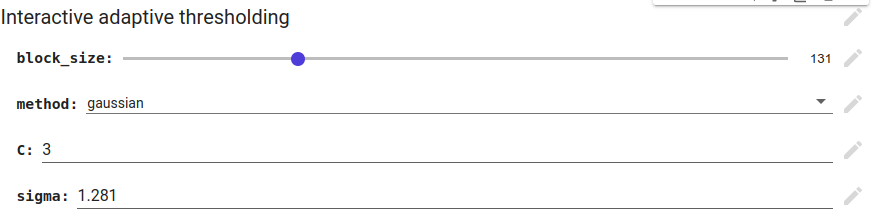

use this image to test your code

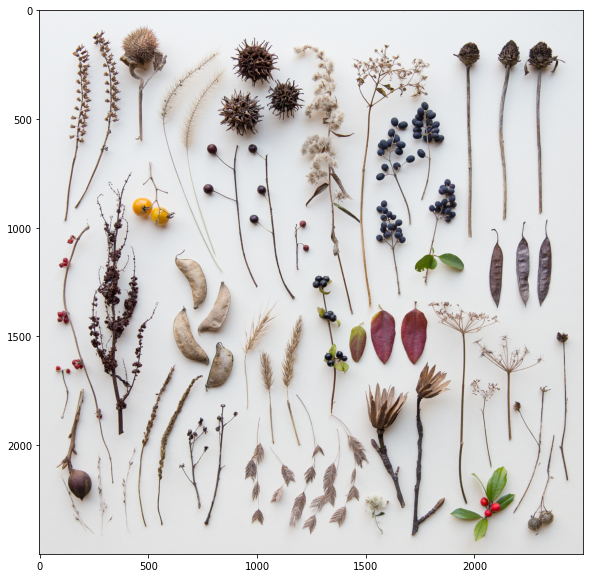

In [3]:
# DO NOT change these codes
img = cv2.imread("th_img.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
showInRow([img])

### Solution

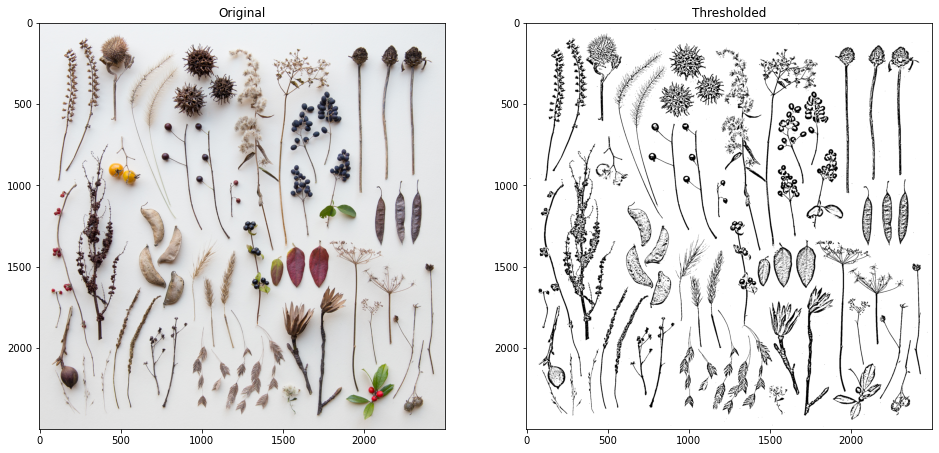

In [4]:
""" describe your code steps with comments """
""" weight 3% """

def get_gaussian_kern(kernl_size=21, sig=1):
    """Returns a 2D Gaussian kernel."""
    """ weight 5% """
    # initialize 1-dimensional tensor of indices with center element 0
    idx_1d = np.linspace(0, kernl_size - 1, kernl_size) - kernl_size // 2
    
    # create 2-dimensional tensor of indices with center element 0 (can be considered as a matrix of 
    # x-coordinates of corresponding elements)
    idx_2d = np.tile(idx_1d, (kernl_size, 1))
    
    # compute numerator of exponent (x^2 + y^2)
    grid = (idx_2d ** 2 + idx_2d.T ** 2)
    
    # compute gaussian kernel according to Lecture 2 slide 33
    gaussian_kernel_grid = (2 * np.pi * sig ** 2) ** -1 * np.exp(- grid / (2 * sig ** 2))
    
    # normalize kernel
    gaussian_kernel = gaussian_kernel_grid / gaussian_kernel_grid.sum()
    return gaussian_kernel

def adaptivethresholding(image, thresholdingtype = 'mean', block_size = 3, sig=1, C=3):
    """
    Function calculates adaptive thresholding for a given image
    Input:
        image: grayscale or color image
        thresholding_type: type of thresholding;
            possible values: 'mean' and 'gaussian'
        block_size: kernel size in which the threshold value is
            calculated for the current pixel
        C: offset value
    Output:
        image_bw: binary thresholded image
    """
    """ weight 5% """
    # let's perform all operations on local copy of image
    _image = image.copy()
    
    # make image in grayscale if necessary
    if len(_image.shape) == 3:
      _image = cv2.cvtColor(_image, cv2.COLOR_RGB2GRAY)
    
    # compute number of pixels to pad
    to_pad = block_size // 2
    # perform padding with to_pad number of pixels before and after
    _image = np.pad(_image, [to_pad] * 2)
    
    # select kernel according to selected thresholding type
    if thresholdingtype == "mean":
      kernel = np.ones([block_size] * 2) / block_size ** 2
    elif thresholdingtype == "gaussian":
      kernel = get_gaussian_kern(block_size, sig)
    else:
      raise NotImplementedError("Supported types are 'mean' and 'gaussian'!") 

    # apply kernel to image and subtract offset
    threshold = cv2.filter2D(_image, ddepth=-1, kernel=kernel) - C
    # adaptive thresholding
    image_bw_pad = 255. * (_image > threshold).astype(np.int64)
    # remove padding
    image_bw = image_bw_pad[to_pad:-to_pad, to_pad:-to_pad]

    return image_bw

""" write code to create the required interactive interface """
""" weight 2% """
#@title Interactive adaptive thresholding { run: "auto" }
block_size = 72 #@param {type: "slider", min: 1, max: 200, step: 1}
method = "gaussian" #@param ["gaussian", "mean"]
C = 10 #@param {type: "integer"}
sigma = 6 #@param {type: "number"}

# usage of method
image_bw = adaptivethresholding(
    img, 
    thresholdingtype=method, 
    block_size=block_size, 
    sig=sigma, 
    C=C
)

showInRow([img, image_bw], ["Original", "Thresholded"])

### Task 2: Template Matching

Detect the location of the template (book.jpg) within the scene (scene.jpg)
you should solve the problem only with the method `cv2.matchTemplate`

use interactive interface to select the best method



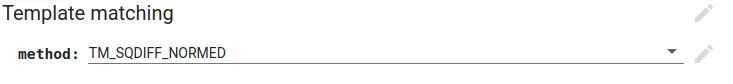

The output should be like follow:

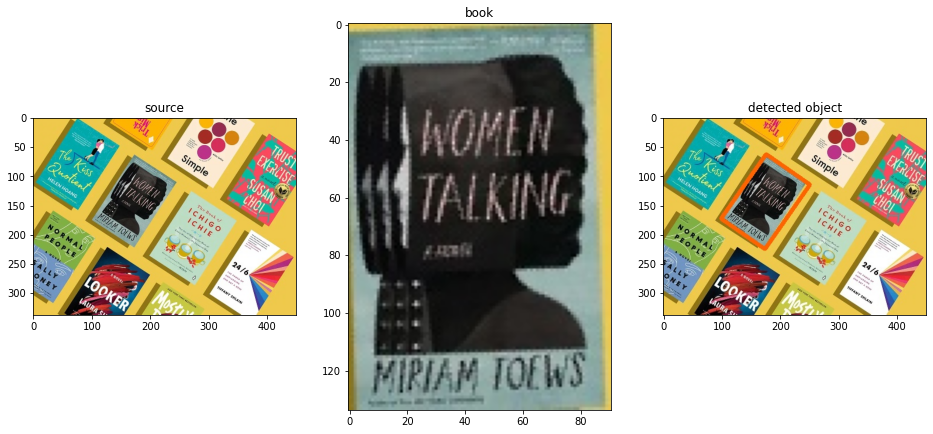

In [5]:
# DO NOT change these codes
scene = cv2.imread("scene.jpg")
scene = cv2.cvtColor(scene, cv2.COLOR_BGR2RGB)
book = cv2.imread("book.jpg")
book = cv2.cvtColor(book, cv2.COLOR_BGR2RGB)
final = cv2.imread("final_template.jpg")
final = cv2.cvtColor(final, cv2.COLOR_BGR2RGB)
showInRow([scene, book, final],["source",  "book", "detected object"])

### Solution

Selected angle of 35 degrees with corresponding score of 383415.0


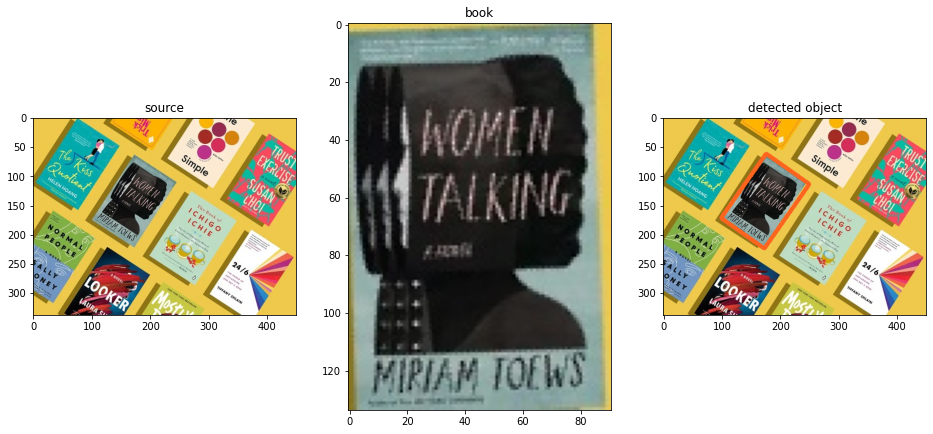

In [6]:
""" write code to create the required interactive interface """
""" weight 5% """

#@title Template matching { run: "auto" }
method = "TM_SQDIFF" #@param ["TM_SQDIFF_NORMED", "TM_CCOEFF", "TM_CCOEFF_NORMED", "TM_CCORR", "TM_CCORR_NORMED", "TM_SQDIFF"]
# take enum of selected method
method = getattr(cv2, method)

""" describe your code steps with comments """
""" weight 5% """

""" the main code """
""" weight 15% """
# let's perform all operations on local copy of image
_scene = scene.copy()

# get book dimensions
height, width, _ = book.shape

# define family of square difference methods
SQFAM = [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]

# since out scene is rotated compared to template, it makes sense to test different angles
# for square difference methods initial best score will be positive, for others — negative
best_score = -1e10
if method in SQFAM:
  best_score *= -1
# auxiliary vars for top left coordinates and angle with best score
best_top_left = (0, 0)
best_angle = 0

# compute center of image
shape = np.array(scene.shape[::-1])[1:]
center = shape / 2
# test different angles
for angle in range(0, 361):
  # create rotation matrix that preserves same scale
  rm = cv2.getRotationMatrix2D(center, angle, scale=1.0)
  
  # rotate scene by an angle using rotation matrix
  scene_r = cv2.warpAffine(scene, rm, shape, flags=cv2.INTER_LINEAR)

  # apply template matching
  result = cv2.matchTemplate(scene_r, book, method)
  
  # observe min and max intensity values 
  min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
  
  # if selected square difference method, consider min value
  if method in SQFAM:
    top_left = min_loc
    score = min_val
    # save best score
    if score < best_score:
      best_score = score
      best_top_left = top_left
      best_angle = angle
  # otherwise, consider max value
  else:
    top_left = max_loc
    score = max_val
    # save best score
    if score > best_score:
      best_score = score
      best_top_left = top_left
      best_angle = angle

# compute coordinates of each book corner 
x, y = best_top_left
top_left = np.array(best_top_left)
top_right = np.array([x + width, y])
bottom_left = np.array([x, y + height])
bottom_right = np.array([x + width, y + height])

# create rotation matrix of angle with opposite magnitude
rm_i = cv2.getRotationMatrix2D(center, -best_angle, scale=1.0)

# rotate 2d points
add_1 = lambda x: np.array(list(x) + [1.])
rotate_point = lambda x: rm_i.dot(add_1(x).T).astype(np.int64)

top_left = rotate_point(top_left)
top_right = rotate_point(top_right)
bottom_left = rotate_point(bottom_left)
bottom_right = rotate_point(bottom_right)

# plot a bounding box
color = (255,100,30)
thickness = 5
cv2.line(_scene, top_left, top_right, color, thickness)
cv2.line(_scene, top_right, bottom_right, color, thickness)
cv2.line(_scene, bottom_right, bottom_left, color, thickness)
cv2.line(_scene, bottom_left, top_left, color, thickness)

# print statistics
print(f"Selected angle of {best_angle} degrees with corresponding score of {best_score}")
showInRow([scene, book, _scene],["source",  "book", "detected object"])

## Task3: Classify objects using Contour features

for the following image, extract the numbre of the object, the contour of each object, then classify the objects based on their shapes and write the class number on each object as follows

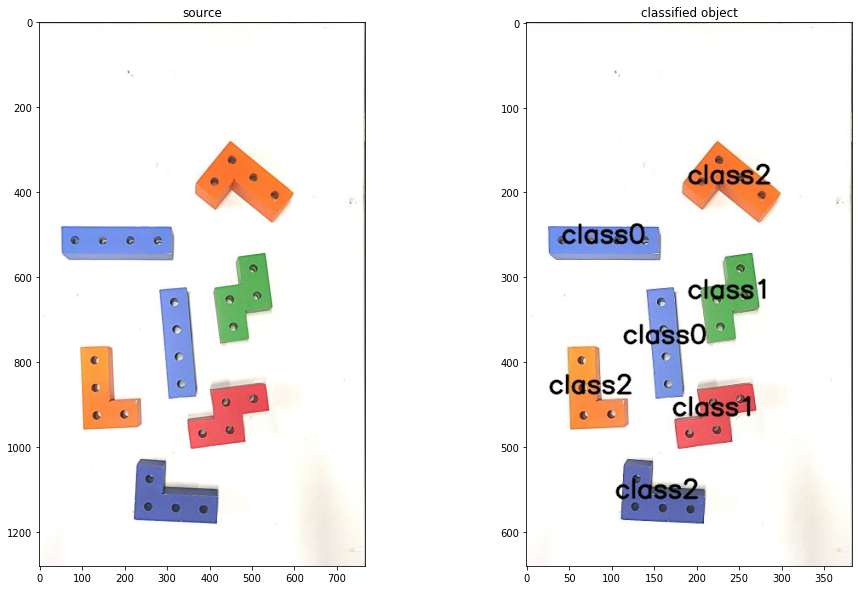

In [7]:
# DO NOT change these codes
cnt_img = cv2.imread("cnt_img.jpg")
cnt_img = cv2.cvtColor(cnt_img, cv2.COLOR_BGR2RGB)
classes = cv2.imread("classes.jpg")
classes = cv2.cvtColor(classes, cv2.COLOR_BGR2RGB)
showInRow([cnt_img, classes],["source", "classified object"])

### Solution

Number of detected objects is 7


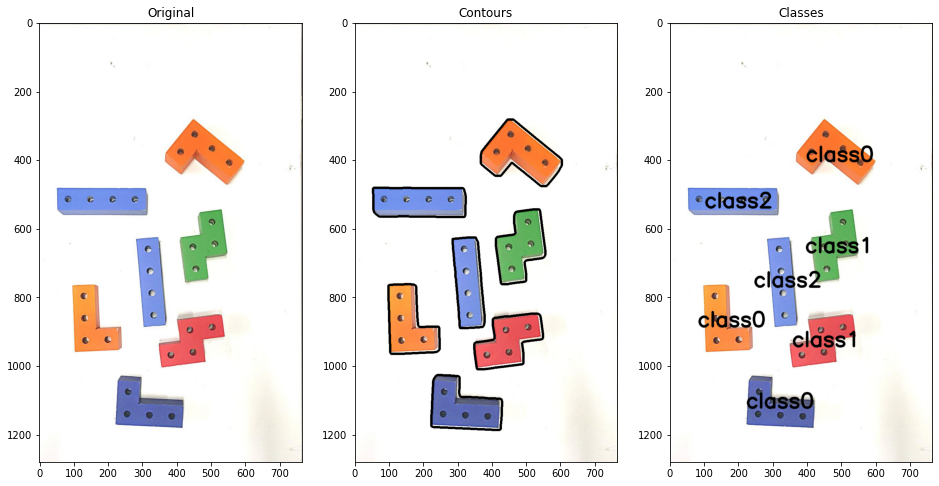

In [8]:
""" describe your code steps with comments """
""" weight 5% """

""" extract the correct number of the objects and get their contours """
""" weight 10% """

""" extract the correct number of the objects and get their contours """
""" weight 15% """

# let's perform all operations on local copy of image
_cnt_img = cnt_img.copy()
_cnt_img_contours = cnt_img.copy()
_cnt_img_classes = cnt_img.copy()

# make image grayscale
_cnt_img = cv2.cvtColor(_cnt_img, cv2.COLOR_BGR2GRAY)

# apply blurring: as you can see there are some dots in the background, blurring will help to omit them
# emperically I've found that sequence of median, gaussian and median allows reducing number of iterations
# for erosion and dilation
_cnt_img = cv2.medianBlur(_cnt_img, 7)
_cnt_img = cv2.GaussianBlur(_cnt_img, (11, 11), 0)
_cnt_img = cv2.medianBlur(_cnt_img, 3)

# apply binary thresholding
_, _cnt_img = cv2.threshold(_cnt_img, 180, 255, cv2.THRESH_BINARY_INV)

# apply erosion and dilation to remove holes and background artifacts
# the reason is that they will be detected as separate contours, which is unwanted
# the basic idea is to firstly erode all artifacts and only then to fill in holes
_cnt_img = cv2.erode(_cnt_img, np.ones((3, 3), np.uint8), iterations=3)
_cnt_img = cv2.dilate(_cnt_img, np.ones((4, 4), np.uint8), iterations=5)

# find contours of objects on prepared image
contours, hierarchy = cv2.findContours(_cnt_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# determine number of detected objects
num_objects = len(contours)
print(f"Number of detected objects is {num_objects}")

# draw contours of detected objects
cv2.drawContours(_cnt_img_contours, contours, -1, (0,0,0), 5)

# let's use additional variable to keep track of detected classes
# each new entry will be number of corners and idx — label of a class
classes = list()
# iterate over all found contours
for c in contours:
  # calculate how close approximation should be to the contour
  eps = 0.03 * cv2.arcLength(c, True)
  
  # approximate shape and find number of corners
  num_corners = len(cv2.approxPolyDP(c, eps, True))

  # check whether shape belongs to some class
  if num_corners not in classes:
    classes.append(num_corners)
  
  # format a label caption
  label = f"class{classes.index(num_corners)}"
  
  # frankly speaking it's better to compute center of mass for each contour, but I will go with average for each dimension
  mean = c.mean(axis=0)[0].astype(np.int64)
  
  # fine-tune coordinates not to allign on objects to make it look like in the picture
  centroid = mean[0] - 90, mean[1] + 15

  # write label caption next to each object
  cv2.putText(
      _cnt_img_classes, 
      label, 
      centroid, 
      cv2.FONT_HERSHEY_SIMPLEX, 
      2, (0, 0, 0), 5, 
      cv2.LINE_AA
  )

# show the obtained result
showInRow([cnt_img, _cnt_img_contours, _cnt_img_classes], ["Original", "Contours", "Classes"])

## Task 4: Count objects in image

Using only connected components to segment the objects in this image

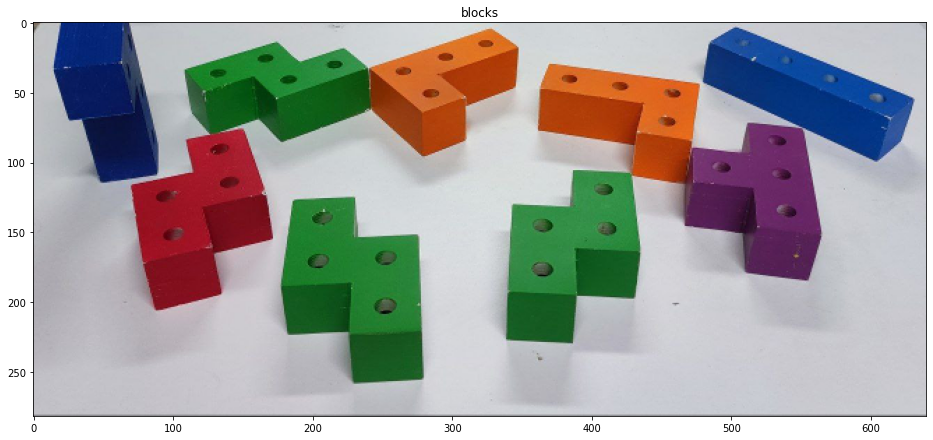

In [9]:
# DO NOT change these codes
blocks = read_and_resize("blocks.jpg")
showInRow([blocks],["blocks"])

The output should be like this

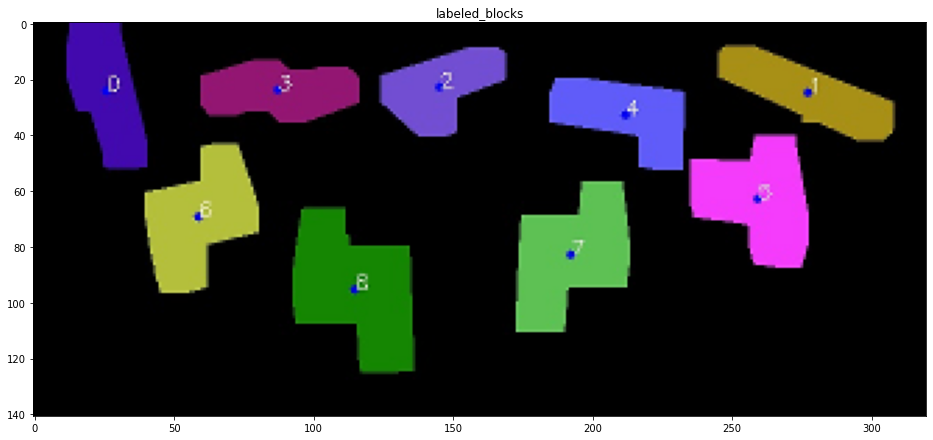

In [10]:
# DO NOT change these codes
labeled_blocks = read_and_resize("blocks_labeld.jpg")
showInRow([labeled_blocks],["labeled_blocks"])

Number of detected objects is 9


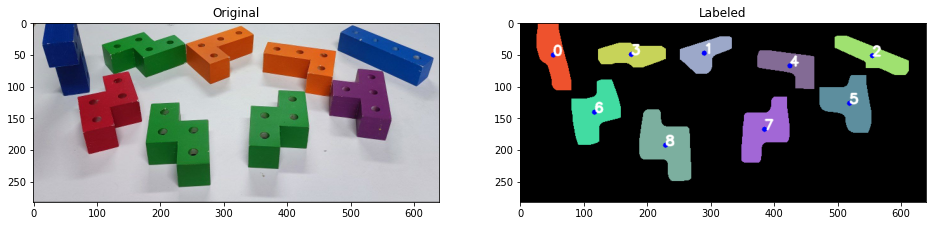

In [11]:
""" describe your code steps with comments """
""" weight 5% """

""" extract the correct number of the objects using connected components """
""" weight 15% """

# let's perform all operations on local copy of image
_blocks = blocks.copy()

# make image grayscale
_blocks = cv2.cvtColor(_blocks, cv2.COLOR_BGR2GRAY)

# apply blurring: as you can see there are some dots in the background, blurring will help to omit them
# emperically I've found that sequence of median, gaussian and median allows reducing number of iterations
# for erosion and dilation
_blocks = cv2.medianBlur(_blocks, 9)
_blocks = cv2.GaussianBlur(_blocks, (11, 11), 0)
_blocks = cv2.medianBlur(_blocks, 7)

# apply binary thresholding
_, _blocks = cv2.threshold(_blocks, 130, 255, cv2.THRESH_BINARY_INV)

# apply erosion and dilation to remove holes and background artifacts
# the reason is that they will be detected as separate contours, which is unwanted
# the basic idea is to firstly erode all artifacts and only then to fill in holes
_blocks = cv2.erode(_blocks, np.ones((9, 9), np.uint8), iterations=4)
_blocks = cv2.dilate(_blocks, np.ones((9, 9), np.uint8), iterations=2)

# apply method of connected components (took 4 as connectivity)
n_labels, labels, _, centroids = cv2.connectedComponentsWithStats(_blocks, 4, cv2.CV_32S)

# number of objects is number of labels excluding background
print(f"Number of detected objects is {n_labels - 1}")

""" display the image with the labeled objects in different colors as it is shown ablove """
""" weight 10% """

# generate palette
palette = generate_colors(n_labels - 1)

# initialize tensor for image with labeled objects in different colors
_blocks_labeled = np.zeros_like(blocks)

# iterate over palette
for idx, color in enumerate(palette):
  # create binary mask for an object
  # note that object labels start from 1
  mask = labels == idx + 1

  # change color of region corresponding to object
  _blocks_labeled[mask, :] = color

  # get centroid of an object by label
  centroid = centroids[idx + 1].astype(np.int64)

  # draw circle as shown in reference
  cv2.circle(_blocks_labeled, centroid, 4, (0, 0, 255), -1)

  # write label caption 
  cv2.putText(
      _blocks_labeled, 
      str(idx), 
      centroid, 
      cv2.FONT_HERSHEY_SIMPLEX, 
      0.7, (255, 255, 255), 2, 
      cv2.LINE_AA
  )

# show the obtained result
showInRow([blocks, _blocks_labeled], ["Original", "Labeled"])
